In [1]:
import numpy as np 
import csv
import pandas as pd
import matplotlib.pyplot as plt
from math import pi, exp, sqrt
%matplotlib inline

------------------------------------

# Data Preprocessing

In [2]:
input_path = "tsv/Gauss.tsv"
input_ds = pd.read_csv(input_path, header = None, sep="\t")

In [3]:
input_ds.head()

,0,1,2
0,A,1.160279,0.459716
1,A,1.946911,1.348953
2,A,1.079743,1.687237
3,A,0.392704,-0.148717
4,A,0.378486,0.993266


In [4]:
n_cols_0 = len(input_ds.columns)
if n_cols_0>3:
    input_ds = input_ds.drop(n_cols_0-1, axis=1) #delete the last column because its NaN for all rows

In [5]:
input_ds.head()

,0,1,2
0,A,1.160279,0.459716
1,A,1.946911,1.348953
2,A,1.079743,1.687237
3,A,0.392704,-0.148717
4,A,0.378486,0.993266


In [6]:
n_cols = len(input_ds.columns)
print("Number of columns:", n_cols)

Number of columns: 3


In [7]:
#initiate empty list for column name
col_name = []

#naming scheme starts with x1 because we will concatenate
#x0 = 1 vector in the list later 
for i in range(n_cols):
    #last column is the target value
    if (i == 0):
        col_name.append('labels')
    else:
        col_name.append('x_{}'.format(i-1))
        
print(col_name)

['labels', 'x_0', 'x_1']


In [8]:
#assigning column names to data set
input_ds.columns = col_name
print (input_ds.head())

  labels       x_0       x_1
0      A  1.160279  0.459716
1      A  1.946911  1.348953
2      A  1.079743  1.687237
3      A  0.392704 -0.148717
4      A  0.378486  0.993266


In [9]:
#calculate labels
vals, counts = np.unique(input_ds['labels'], return_counts= True)
print(vals)
print(counts)

['A' 'B']
[1000 1000]


In [10]:
#set up class
c = np.squeeze(np.asarray(input_ds['labels']))
#print first 5 rows
print(c[:5])

['A' 'A' 'A' 'A' 'A']


In [11]:
#set up attributes
x = input_ds.iloc[:,1:n_cols]
x = np.squeeze(np.asarray(x))
#print first 5 rows
print(x[:5,:])
print("Shape of x:",x.shape)

[[ 1.16027895  0.45971639]
 [ 1.94691074  1.34895332]
 [ 1.07974272  1.6872368 ]
 [ 0.39270401 -0.14871659]
 [ 0.37848597  0.99326567]]
Shape of x: (2000, 2)


-----------------------------------

# Helper Function

In [12]:
def retrieve_class_index(class_col, vals):
    '''
    Retrieve the class index w.r.t the class row
    
    @param class_col: The column or array where the class is stored
    @param vals: list containing the classes
    
    return a list of index
    '''
    index_list = []
    for val in vals:
        index_array = np.where(class_col==val)
        index_list.append(index_array)
    return index_list

def mean(x, index_list, counts):
    '''
    Compute the mean w.r.t class and attribute 
    
    @pararm x: The array of where x attributes is stored 
    @param index_list: list of index w.r.t the class 
    @param counts: the number of particular class
    
    return: An array of mean with size (n_class, n_attribute)
    '''
    class_means = []
    for i in range(len(index_list)):
        #sum the x attributes in rows w.r.t the same class index 
        x_sum = np.sum([x[idx] for idx in index_list[i]], axis=1)
        class_mean = x_sum/counts[i]
        class_means.append(class_mean)
    return np.squeeze(np.asarray(class_means))

def variance(x, index_list, mean_arr, counts):
    '''
    Compute the variance (sigma**2) w.r.t class and attribute 
    
    @pararm x: The array of where x attributes is stored 
    @param index_list: list of index w.r.t the class 
    @param mean_arr: Array of mean with size (n_class, n_attribute)
    @param counts: the number of particular class
    
    return: An array of variance with size (n_class, n_attribute)
    '''
    variance_list = []
    for i in range(len(index_list)):
        #retrieve x attributes w.r.t the same class index 
        x_class = np.array([x[idx] for idx in index_list[i]])
        sum_func = np.sum((x_class-mean_arr[i])**2, axis = 1)
        variance_class = sum_func/(counts[i]-1.0)
        variance_list.append(variance_class)
    return np.squeeze(np.asarray(variance_list))

def likelihood(x, mean, variance):
    '''
    Compute the likelihood, which is the joint probability
    p(a|c), the probability of attribute x, given class c
    
    @param x: x attribute
    @param mean: mean value
    @param variance: variance value
    
    return: likelihood 
    '''
    denominator = sqrt(2*pi*variance)
    exp_term = exp(-(((x-mean)**2)/(2*variance)))
    return exp_term/denominator

def prob_class(class_col, counts):
    '''
    Calculate the probability of each class respectively
    
    @param class_col: The column of class data being stored
    
    return: list of class probability  
    '''
    class_probs = [] # list to store class means
    for count in counts:
        class_prob = count/len(class_col)
        class_probs.append(class_prob)
    return class_probs

def plot_2D(xy_label_A, xy_label_B, title = None): 
    '''
    This function plots a 2D graph for illustrating the data points
    
    @param xy_label_A: x,y data points associating with label A
    @param xy_label_B: x,y data points associating with label B
    @param title: title of the plot
    '''
    plt.plot(xy_label_A['x_0'], xy_label_A['x_1'], 'r^', label='A')
    plt.plot(xy_label_B['x_0'], xy_label_B['x_1'], 'bs', label='B')
    if (title!=None):
        plt.title(title)
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.legend(loc='upper right')
    plt.show()

----------------------------------------

# Main Algorithm

In [13]:
index_list = retrieve_class_index(c, vals)
prior_arr = prob_class(c, counts)
mean_arr = mean(x, index_list, counts)
variance_arr = variance(x, index_list, mean_arr, counts)

In [14]:
print(mean_arr)

n_clc = mean_arr.shape[0]
n_att = mean_arr.shape[1]
#read as M_clc_att
mean_interpretation = []
for clc in range(n_clc):
    for att in range(n_att):
        mean_interpretation.append("M_{}{}".format(clc,att))
mean_interpretation = np.reshape(mean_interpretation, (n_clc,n_att))

print()
print(mean_interpretation)

[[0.98655663 0.99604679]
 [3.9602565  4.06531528]]

[['M_00' 'M_01']
 ['M_10' 'M_11']]


In [15]:
print(variance_arr)

n_clc = mean_arr.shape[0]
n_att = mean_arr.shape[1]
#read as V_clc_att
variance_interpretation = []
for clc in range(n_clc):
    for att in range(n_att):
        variance_interpretation.append("V_{}{}".format(clc,att))
variance_interpretation = np.reshape(variance_interpretation, (n_clc,n_att))

print()
print(variance_interpretation)

[[0.95622184 1.02813383]
 [5.19960278 6.53548798]]

[['V_00' 'V_01']
 ['V_10' 'V_11']]


In [16]:
#testing for likelihood of dataset row 1, x[0,0],x[0,1]  with mean and variance of class A 
like_01 = likelihood(x[0,0], mean_arr[0,0], variance_arr[0,0])
like_02 = likelihood(x[0,1], mean_arr[0,1], variance_arr[0,1])
classifier = prior_arr[0]*like_01*like_02
print(classifier)

0.06868775482822762


In [17]:
#testing for likelihood of dataset row 1, x[0,0],x[0,1]  with mean and variance of class B
like_03 = likelihood(x[0,0], mean_arr[1,0], variance_arr[1,0])
like_04 = likelihood(x[0,1], mean_arr[1,1], variance_arr[1,1])
classifier_02 = prior_arr[1]*like_03*like_04
print(classifier_02)

0.002375786465612107


In [18]:
idx_list = np.squeeze(np.asarray(index_list)) #converting tuples to array 
argmax_list = []
for i in range(n_clc): # index list depends on the number of class
    idx_argmax_list = []
    for idx in idx_list[i]:
        posterior_list= []
        for clc in range(n_clc):
            total_likelihood = 1
            for att in range(n_att):
                total_likelihood *=likelihood(x[idx, att], mean_arr[clc, att], variance_arr[clc, att])
                print("x[{},{}], mean[{},{}], variance[{},{}]".format(idx, att, clc, att, clc, att))
            posterior_list.append(prior_arr[clc]*total_likelihood)
        print()
        idx_argmax = np.argmax(posterior_list)
        idx_argmax_list.append(idx_argmax)
    argmax_list.append(idx_argmax_list)

x[0,0], mean[0,0], variance[0,0]
x[0,1], mean[0,1], variance[0,1]
x[0,0], mean[1,0], variance[1,0]
x[0,1], mean[1,1], variance[1,1]

x[1,0], mean[0,0], variance[0,0]
x[1,1], mean[0,1], variance[0,1]
x[1,0], mean[1,0], variance[1,0]
x[1,1], mean[1,1], variance[1,1]

x[2,0], mean[0,0], variance[0,0]
x[2,1], mean[0,1], variance[0,1]
x[2,0], mean[1,0], variance[1,0]
x[2,1], mean[1,1], variance[1,1]

x[3,0], mean[0,0], variance[0,0]
x[3,1], mean[0,1], variance[0,1]
x[3,0], mean[1,0], variance[1,0]
x[3,1], mean[1,1], variance[1,1]

x[4,0], mean[0,0], variance[0,0]
x[4,1], mean[0,1], variance[0,1]
x[4,0], mean[1,0], variance[1,0]
x[4,1], mean[1,1], variance[1,1]

x[5,0], mean[0,0], variance[0,0]
x[5,1], mean[0,1], variance[0,1]
x[5,0], mean[1,0], variance[1,0]
x[5,1], mean[1,1], variance[1,1]

x[6,0], mean[0,0], variance[0,0]
x[6,1], mean[0,1], variance[0,1]
x[6,0], mean[1,0], variance[1,0]
x[6,1], mean[1,1], variance[1,1]

x[7,0], mean[0,0], variance[0,0]
x[7,1], mean[0,1], variance[0,1]
x[7

x[636,1], mean[1,1], variance[1,1]

x[637,0], mean[0,0], variance[0,0]
x[637,1], mean[0,1], variance[0,1]
x[637,0], mean[1,0], variance[1,0]
x[637,1], mean[1,1], variance[1,1]

x[638,0], mean[0,0], variance[0,0]
x[638,1], mean[0,1], variance[0,1]
x[638,0], mean[1,0], variance[1,0]
x[638,1], mean[1,1], variance[1,1]

x[639,0], mean[0,0], variance[0,0]
x[639,1], mean[0,1], variance[0,1]
x[639,0], mean[1,0], variance[1,0]
x[639,1], mean[1,1], variance[1,1]

x[640,0], mean[0,0], variance[0,0]
x[640,1], mean[0,1], variance[0,1]
x[640,0], mean[1,0], variance[1,0]
x[640,1], mean[1,1], variance[1,1]

x[641,0], mean[0,0], variance[0,0]
x[641,1], mean[0,1], variance[0,1]
x[641,0], mean[1,0], variance[1,0]
x[641,1], mean[1,1], variance[1,1]

x[642,0], mean[0,0], variance[0,0]
x[642,1], mean[0,1], variance[0,1]
x[642,0], mean[1,0], variance[1,0]
x[642,1], mean[1,1], variance[1,1]

x[643,0], mean[0,0], variance[0,0]
x[643,1], mean[0,1], variance[0,1]
x[643,0], mean[1,0], variance[1,0]
x[643,1], mea

x[747,1], mean[1,1], variance[1,1]

x[748,0], mean[0,0], variance[0,0]
x[748,1], mean[0,1], variance[0,1]
x[748,0], mean[1,0], variance[1,0]
x[748,1], mean[1,1], variance[1,1]

x[749,0], mean[0,0], variance[0,0]
x[749,1], mean[0,1], variance[0,1]
x[749,0], mean[1,0], variance[1,0]
x[749,1], mean[1,1], variance[1,1]

x[750,0], mean[0,0], variance[0,0]
x[750,1], mean[0,1], variance[0,1]
x[750,0], mean[1,0], variance[1,0]
x[750,1], mean[1,1], variance[1,1]

x[751,0], mean[0,0], variance[0,0]
x[751,1], mean[0,1], variance[0,1]
x[751,0], mean[1,0], variance[1,0]
x[751,1], mean[1,1], variance[1,1]

x[752,0], mean[0,0], variance[0,0]
x[752,1], mean[0,1], variance[0,1]
x[752,0], mean[1,0], variance[1,0]
x[752,1], mean[1,1], variance[1,1]

x[753,0], mean[0,0], variance[0,0]
x[753,1], mean[0,1], variance[0,1]
x[753,0], mean[1,0], variance[1,0]
x[753,1], mean[1,1], variance[1,1]

x[754,0], mean[0,0], variance[0,0]
x[754,1], mean[0,1], variance[0,1]
x[754,0], mean[1,0], variance[1,0]
x[754,1], mea

x[858,0], mean[1,0], variance[1,0]
x[858,1], mean[1,1], variance[1,1]

x[859,0], mean[0,0], variance[0,0]
x[859,1], mean[0,1], variance[0,1]
x[859,0], mean[1,0], variance[1,0]
x[859,1], mean[1,1], variance[1,1]

x[860,0], mean[0,0], variance[0,0]
x[860,1], mean[0,1], variance[0,1]
x[860,0], mean[1,0], variance[1,0]
x[860,1], mean[1,1], variance[1,1]

x[861,0], mean[0,0], variance[0,0]
x[861,1], mean[0,1], variance[0,1]
x[861,0], mean[1,0], variance[1,0]
x[861,1], mean[1,1], variance[1,1]

x[862,0], mean[0,0], variance[0,0]
x[862,1], mean[0,1], variance[0,1]
x[862,0], mean[1,0], variance[1,0]
x[862,1], mean[1,1], variance[1,1]

x[863,0], mean[0,0], variance[0,0]
x[863,1], mean[0,1], variance[0,1]
x[863,0], mean[1,0], variance[1,0]
x[863,1], mean[1,1], variance[1,1]

x[864,0], mean[0,0], variance[0,0]
x[864,1], mean[0,1], variance[0,1]
x[864,0], mean[1,0], variance[1,0]
x[864,1], mean[1,1], variance[1,1]

x[865,0], mean[0,0], variance[0,0]
x[865,1], mean[0,1], variance[0,1]
x[865,0], mea

x[1525,0], mean[0,0], variance[0,0]
x[1525,1], mean[0,1], variance[0,1]
x[1525,0], mean[1,0], variance[1,0]
x[1525,1], mean[1,1], variance[1,1]

x[1526,0], mean[0,0], variance[0,0]
x[1526,1], mean[0,1], variance[0,1]
x[1526,0], mean[1,0], variance[1,0]
x[1526,1], mean[1,1], variance[1,1]

x[1527,0], mean[0,0], variance[0,0]
x[1527,1], mean[0,1], variance[0,1]
x[1527,0], mean[1,0], variance[1,0]
x[1527,1], mean[1,1], variance[1,1]

x[1528,0], mean[0,0], variance[0,0]
x[1528,1], mean[0,1], variance[0,1]
x[1528,0], mean[1,0], variance[1,0]
x[1528,1], mean[1,1], variance[1,1]

x[1529,0], mean[0,0], variance[0,0]
x[1529,1], mean[0,1], variance[0,1]
x[1529,0], mean[1,0], variance[1,0]
x[1529,1], mean[1,1], variance[1,1]

x[1530,0], mean[0,0], variance[0,0]
x[1530,1], mean[0,1], variance[0,1]
x[1530,0], mean[1,0], variance[1,0]
x[1530,1], mean[1,1], variance[1,1]

x[1531,0], mean[0,0], variance[0,0]
x[1531,1], mean[0,1], variance[0,1]
x[1531,0], mean[1,0], variance[1,0]
x[1531,1], mean[1,1], 

x[1747,1], mean[0,1], variance[0,1]
x[1747,0], mean[1,0], variance[1,0]
x[1747,1], mean[1,1], variance[1,1]

x[1748,0], mean[0,0], variance[0,0]
x[1748,1], mean[0,1], variance[0,1]
x[1748,0], mean[1,0], variance[1,0]
x[1748,1], mean[1,1], variance[1,1]

x[1749,0], mean[0,0], variance[0,0]
x[1749,1], mean[0,1], variance[0,1]
x[1749,0], mean[1,0], variance[1,0]
x[1749,1], mean[1,1], variance[1,1]

x[1750,0], mean[0,0], variance[0,0]
x[1750,1], mean[0,1], variance[0,1]
x[1750,0], mean[1,0], variance[1,0]
x[1750,1], mean[1,1], variance[1,1]

x[1751,0], mean[0,0], variance[0,0]
x[1751,1], mean[0,1], variance[0,1]
x[1751,0], mean[1,0], variance[1,0]
x[1751,1], mean[1,1], variance[1,1]

x[1752,0], mean[0,0], variance[0,0]
x[1752,1], mean[0,1], variance[0,1]
x[1752,0], mean[1,0], variance[1,0]
x[1752,1], mean[1,1], variance[1,1]

x[1753,0], mean[0,0], variance[0,0]
x[1753,1], mean[0,1], variance[0,1]
x[1753,0], mean[1,0], variance[1,0]
x[1753,1], mean[1,1], variance[1,1]

x[1754,0], mean[0,0],

x[1858,1], mean[0,1], variance[0,1]
x[1858,0], mean[1,0], variance[1,0]
x[1858,1], mean[1,1], variance[1,1]

x[1859,0], mean[0,0], variance[0,0]
x[1859,1], mean[0,1], variance[0,1]
x[1859,0], mean[1,0], variance[1,0]
x[1859,1], mean[1,1], variance[1,1]

x[1860,0], mean[0,0], variance[0,0]
x[1860,1], mean[0,1], variance[0,1]
x[1860,0], mean[1,0], variance[1,0]
x[1860,1], mean[1,1], variance[1,1]

x[1861,0], mean[0,0], variance[0,0]
x[1861,1], mean[0,1], variance[0,1]
x[1861,0], mean[1,0], variance[1,0]
x[1861,1], mean[1,1], variance[1,1]

x[1862,0], mean[0,0], variance[0,0]
x[1862,1], mean[0,1], variance[0,1]
x[1862,0], mean[1,0], variance[1,0]
x[1862,1], mean[1,1], variance[1,1]

x[1863,0], mean[0,0], variance[0,0]
x[1863,1], mean[0,1], variance[0,1]
x[1863,0], mean[1,0], variance[1,0]
x[1863,1], mean[1,1], variance[1,1]

x[1864,0], mean[0,0], variance[0,0]
x[1864,1], mean[0,1], variance[0,1]
x[1864,0], mean[1,0], variance[1,0]
x[1864,1], mean[1,1], variance[1,1]

x[1865,0], mean[0,0],

In [19]:
argmax_list = np.squeeze(np.asarray(argmax_list)) #convert tuple to array
argmax_list = np.reshape((argmax_list),(-1)) #flatten the array 

In [20]:
#map the idx to the class for comparison
map_idx2class = np.array([vals[idx] for idx in argmax_list])
print(map_idx2class)

['A' 'A' 'A' ... 'B' 'B' 'B']


In [21]:
comparator_arr = np.array([map_idx2class[idx] == c[idx] for idx in range(len(c))])
print(comparator_arr)

[ True  True  True ...  True  True  True]


In [22]:
missclassified = np.sum(np.where(comparator_arr==False,1,0))
print("Number of missclassified class: {}".format(missclassified))
accuracy = (len(c)-missclassified)/len(c)
print("Accuracy = {}".format(accuracy))

Number of missclassified class: 47
Accuracy = 0.9765


------------------------------------

# Write .tsv

In [23]:
n_clc = mean_arr.shape[0]
n_att = mean_arr.shape[1]

output_total = []
for clc in range(n_clc):
    output_list_class = []
    for att in range(n_att):
        output_list_class.append(mean_arr[clc, att])
        output_list_class.append(variance_arr[clc, att])
    output_list_class.append(prior_arr[clc])
    output_total.append(output_list_class)

In [24]:
output_total = np.squeeze(np.asarray(output_total))
print(output_total)

[[0.98655663 0.95622184 0.99604679 1.02813383 0.5       ]
 [3.9602565  5.19960278 4.06531528 6.53548798 0.5       ]]


In [25]:
output_path = 'tsv/Gauss_NB_Solution.tsv'
with open(output_path, 'wt') as write_tsv:
    tsv_writer = csv.writer(write_tsv, delimiter='\t')
    for i in range(len(output_total)):
        tsv_writer.writerow(output_total[i])
    tsv_writer.writerow([missclassified])
write_tsv.close()

--------------------------------

# Data Visualization

## Initial State

In [26]:
#xy points for label A
xy_label_A = input_ds.where(input_ds['labels']=='A').dropna().drop('labels', axis=1)
#xy points for label B
xy_label_B = input_ds.where(input_ds['labels']=='B').dropna().drop('labels', axis=1)

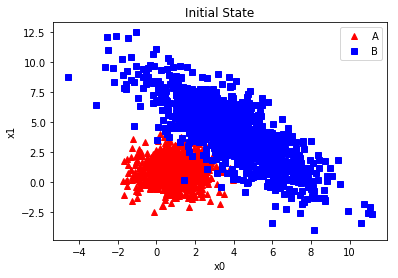

In [27]:
title = 'Initial State'
plot_2D(xy_label_A, xy_label_B, title)

In [28]:
nb_ds = input_ds 
nb_ds['labels']= map_idx2class

#xy points for label A
xy_label_A_nb = input_ds.where(nb_ds['labels']=='A').dropna().drop('labels', axis=1)
#xy points for label B
xy_label_B_nb = input_ds.where(nb_ds['labels']=='B').dropna().drop('labels', axis=1)

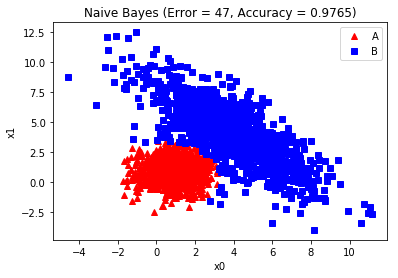

In [29]:
title = 'Naive Bayes (Error = {}, Accuracy = {})'.format(missclassified, accuracy)
plot_2D(xy_label_A_nb, xy_label_B_nb, title)